<a href="https://colab.research.google.com/github/yumkim1016/TP1/blob/main/teamproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('binary_classification_data.csv')

In [ ]:
df.shape

(17898, 9)

### 1.1 데이터 정보

features
- Mean of the integrated profile: 통합 프로필의 평균값
- Standard deviation of the integrated profile: 통합 프로필의 표준 편차
- Excess kurtosis of the integrated profile: 통합 프로필의 과잉 첨도     
  - 과잉첨도 = 첨도 - 예상 정규 분포의 첨도 값      
  - 첨도: 데이터 분포의 꼬리 부분의 두께와 중앙 부분의 뾰족함을 측정하는 통계적 개념. 
    - 정규 분포 (Normal Distribution): 첨도가 0인 경우, 데이터 분포는 대략적으로 정규 분포를 따름.
    - 얇은 꼬리 (Leptokurtic Distribution): 첨도가 0보다 큰 경우, 데이터 분포는 뾰족한 모양. 이는 데이터가 중앙에 집중되어 있고, 극단적인 값들이 상대적으로 더 많이 발생한다는 것을 의미함.
    - 두꺼운 꼬리 (Platykurtic Distribution): 첨도가 0보다 작은 경우, 데이터 분포는 더 평평한 모양을 가지며, 이는 데이터가 중앙에 덜 집중되어 있고, 극단적인 값들이 상대적으로 더 적게 발생한다는 것을 의미함.
- Skewness of the integrated profile: 통합 프로필의 비대칭도
- Mean of the DM-SNR curve: DM-SNR 곡선의 평균값
- Standard deviation of the DM-SNR curve: DM-SNR 곡선의 표준 편차
- Excess kurtosis of the DM-SNR curve: DM-SNR 곡선의 과잉 첨도
- Skewness of the DM-SNR curve: DM-SNR 곡선의 비대칭도       
\* DM-SNR: "Dispersion Measure-Signal-to-Noise Ratio"의 약자. 천문학적 신호를 분석할 때 사용되는 척도로, 해당 신호의 디스퍼젼 메져와 신호 대 잡음 비율의 조합을 의미        
        
target
- target_class: 펄서 스타인지 아닌지 구분(0 or 1)

### 1.2 데이터 특징

In [ ]:
# 데이터 정보 확인
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
df.info() # 확인시 전부 실수로 들어가있는 것 확인. 오탈자문제 배제

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [ ]:
df.describe()
# 통계수치상 Excess kurtosis of the integrated profile 부터 Skewness of the DM-SNR curve 까지 이상치로 추정되는 데이터 발견(max가 75%애서 상당히 동떨어져있음)
# -> 데이터 분석 후 조정필요

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [ ]:
# 비대칭이 매우 심함(약 9:1)
df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [ ]:
# 결측치 확인
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [ ]:
# 중복값 확인
df.duplicated().sum()

0

### 1.3 Check outlier

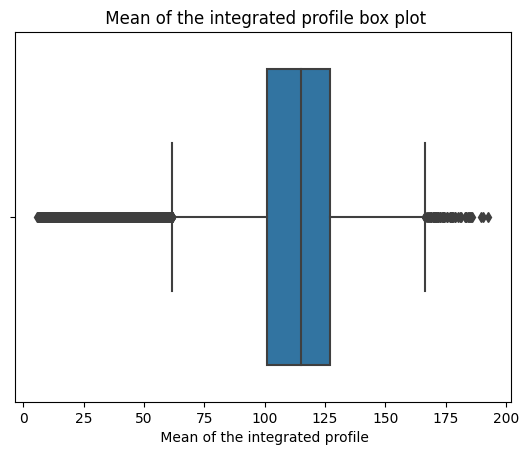

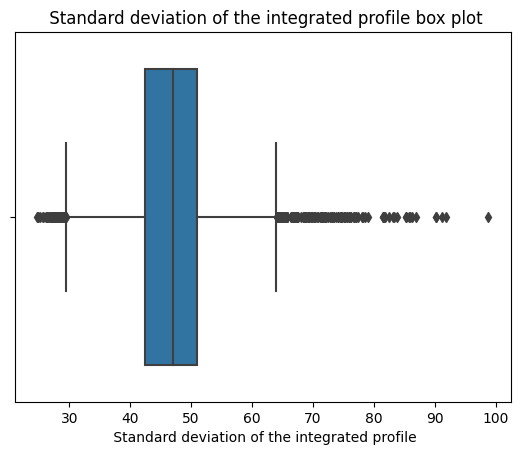

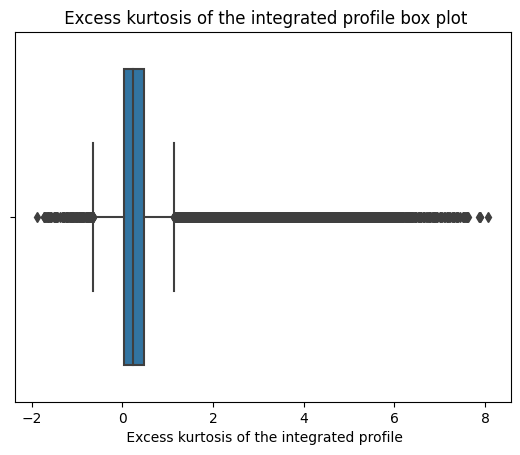

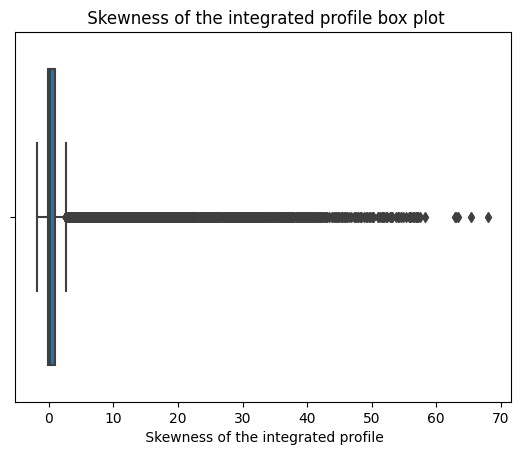

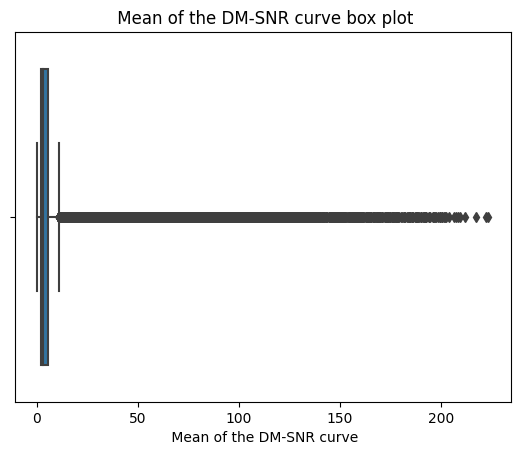

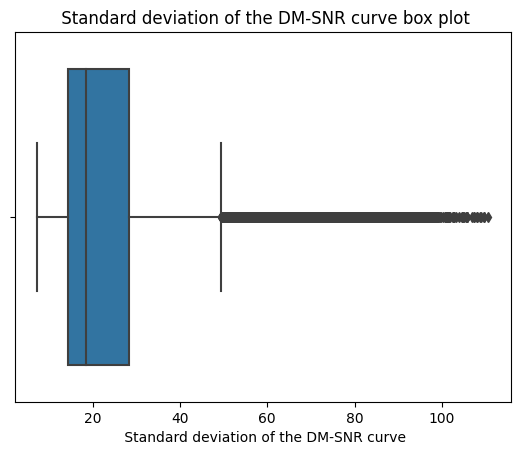

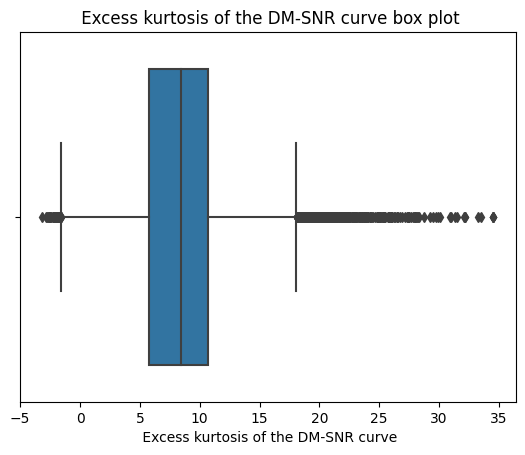

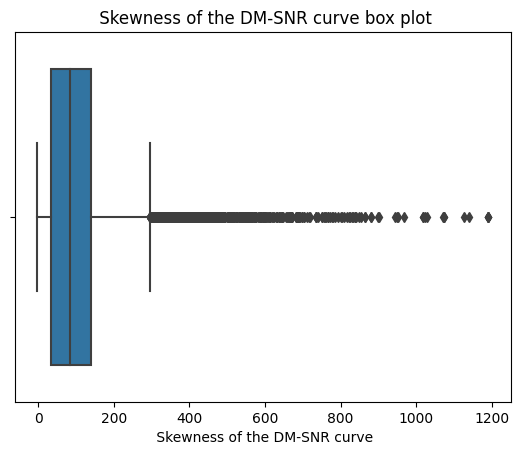

In [ ]:
def feature_boxplot(data,feature):
    plt.title(f'{feature} box plot')
    sns.boxplot(x = data[feature])
    return plt.show()

for column in df.columns[:-1]:
    feature_boxplot(df,column)

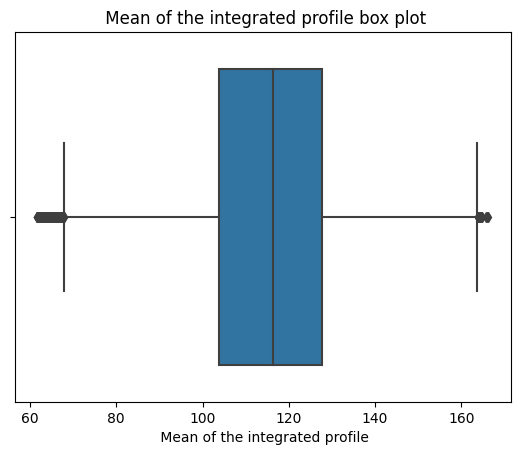

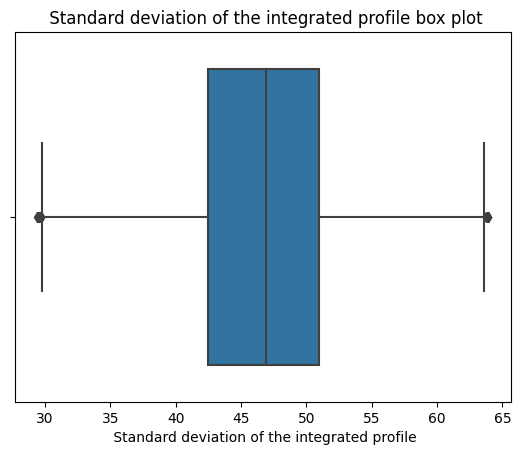

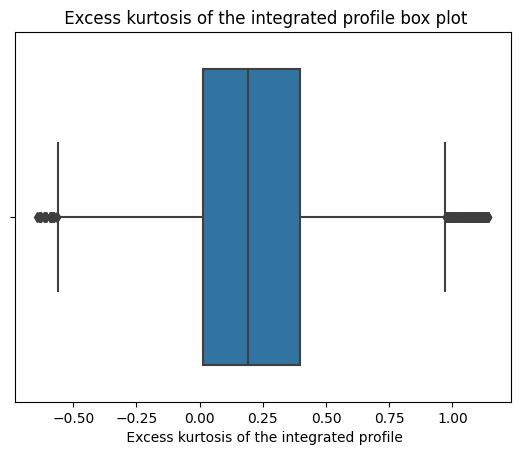

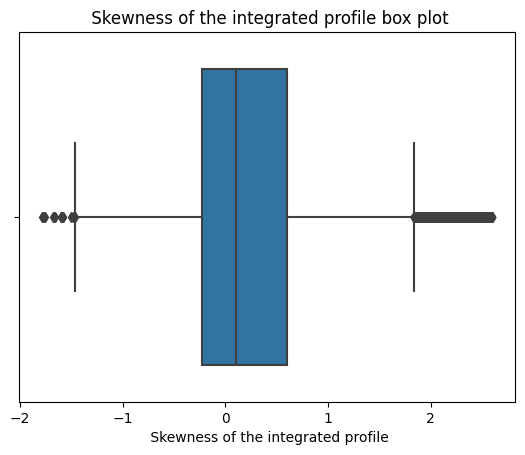

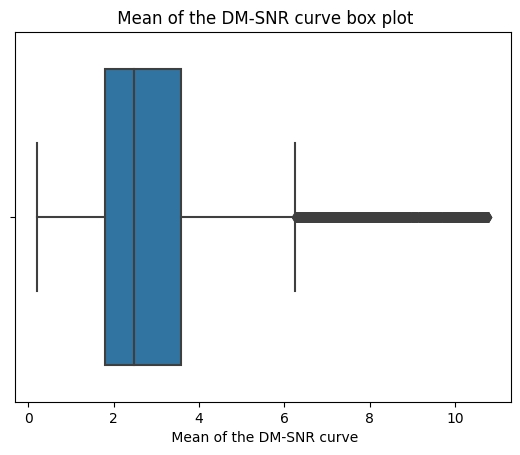

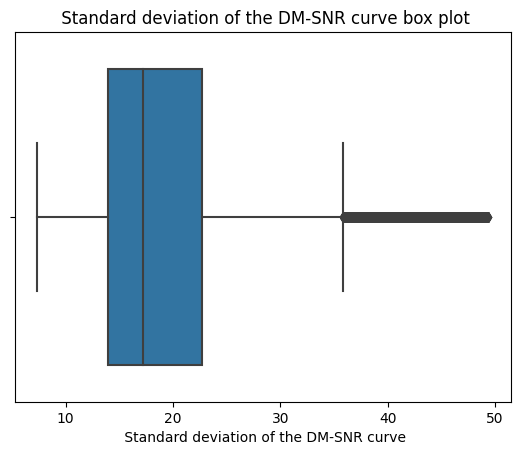

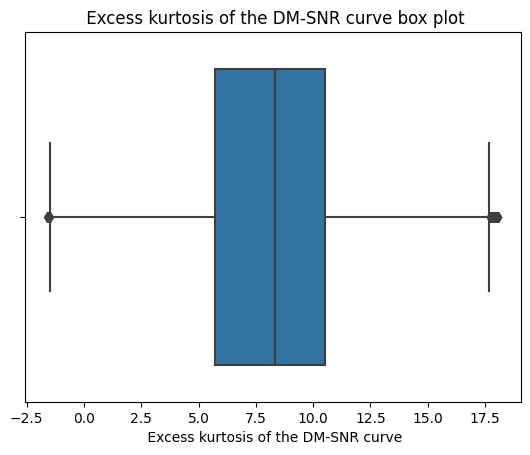

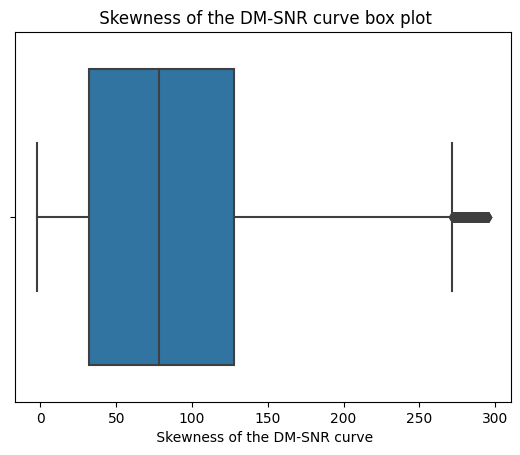

In [ ]:
# 아웃라이어 제거 함수 정의
def remove_outliers(data, feature, fence_factor=1.5):
  Q1 = data[feature].quantile(0.25)
  Q3 = data[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_fence = Q1 - fence_factor * IQR
  upper_fence = Q3 + fence_factor * IQR
  filtered_data = data[(data[feature] >= lower_fence) & (data[feature] <= upper_fence)]
  return filtered_data

# 아웃라이어 제거 적용
for column in df2.columns[:-1]:
  df2 = remove_outliers(df, column, fence_factor=1.5)
  feature_boxplot(df2,column)

In [ ]:
# Outlier 제거 후 shape변화
print(df2.shape)
print(df2['target_class'].value_counts())

(16997, 9)
0    15367
1     1630
Name: target_class, dtype: int64


기존: shape(17898,9)     
0: 16259     
1: 1639

Outlier 제거 후: shape(16997,9)     
0: 15367     
1: 1630

-> 큰 변화 없음, 계속 진행


1.4 Scaling(Min-Max, Standardization 2개 사용해봄)

In [ ]:
df2_minmax = df2.copy()
df2_standard= df2.copy()

features_to_scale = list(df2.drop('target_class', axis=1).columns)

In [ ]:
# Min-Max Scaling(Normalization)

scaler = MinMaxScaler()
df2_minmax[features_to_scale] = scaler.fit_transform(df2[features_to_scale])

# 데이터 저장
df2_minmax.to_csv('binary_minmax.csv', index=False)

In [ ]:
# StandardScaler

scaler = StandardScaler()
df2_standard[features_to_scale] = scaler.fit_transform(df2[features_to_scale])

# 데이터 저장
df2_standard.to_csv('binary_standard.csv', index=False)

### 2. Feature importance / heatmap 

In [ ]:
# Feature Importance

features = df2.drop('target_class', axis=1)
target = df2['target_class']

# 랜덤 포레스트 분류기 모델 생성
rf = RandomForestClassifier(random_state=42)
rf.fit(features, target)

# Feature importance 계산
importances = rf.feature_importances_

# 결과 출력
for feature, importance in zip(features.columns, importances):
    print(f'{feature}: {importance}')

 Mean of the integrated profile: 0.15969562033743376
 Standard deviation of the integrated profile: 0.04130538835929739
 Excess kurtosis of the integrated profile: 0.3892736962752465
 Skewness of the integrated profile: 0.19365494785449852
 Mean of the DM-SNR curve: 0.07068863749097086
 Standard deviation of the DM-SNR curve: 0.06397294401586309
 Excess kurtosis of the DM-SNR curve: 0.038506753628348274
 Skewness of the DM-SNR curve: 0.042902012038341444


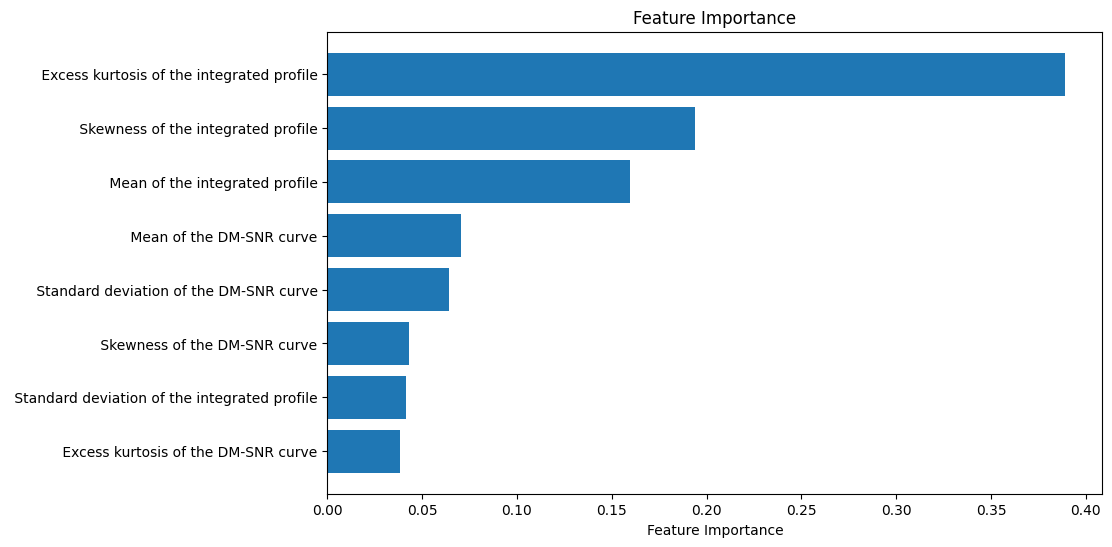

In [ ]:
# bar plot으로 결과 시각화, 높은순서대로 표시

feature_names = features.columns
sorted_indices = np.argsort(importances)
pos = np.arange(sorted_indices.shape[0]) + 0.5

plt.figure(figsize=(10, 6))
plt.barh(pos, importances[sorted_indices], align='center')
plt.yticks(pos, feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

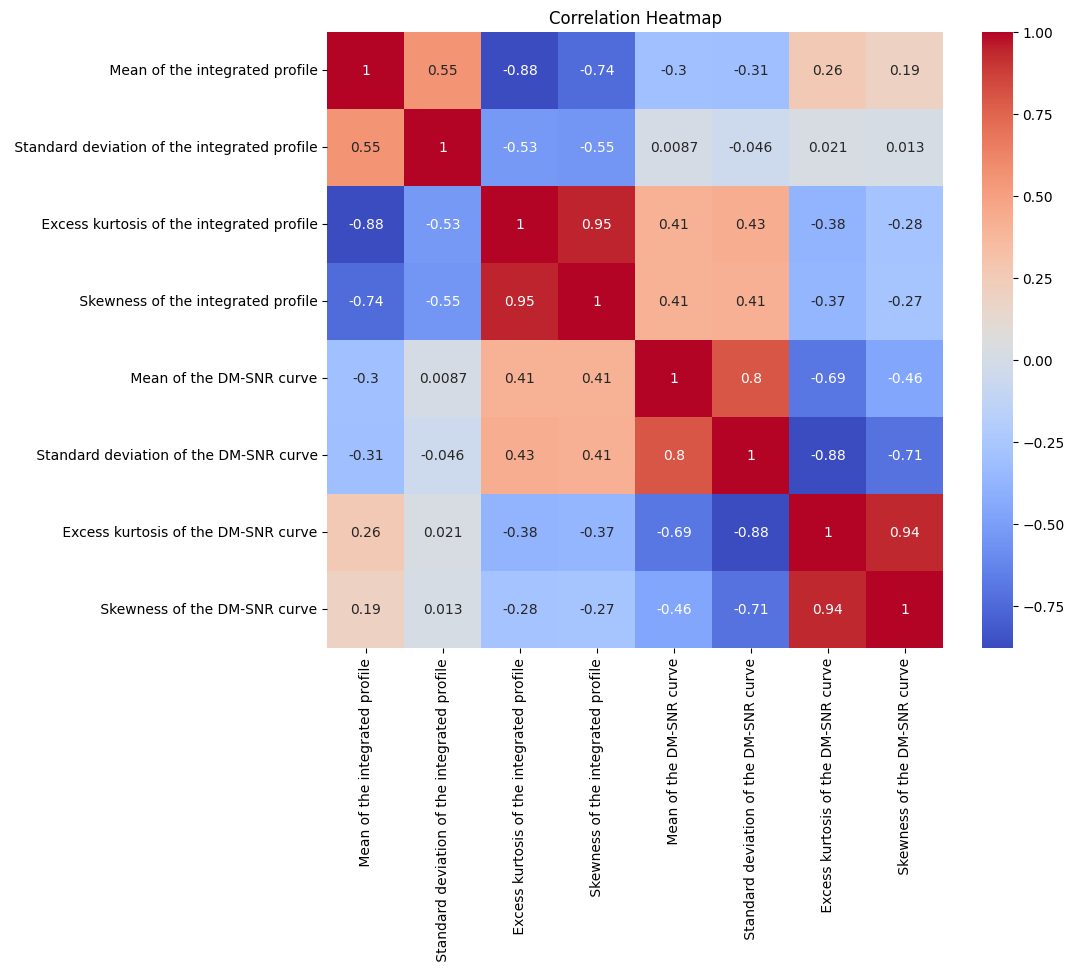

In [ ]:
# Heatmap

# 상관관계 계산
correlation_matrix = features.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

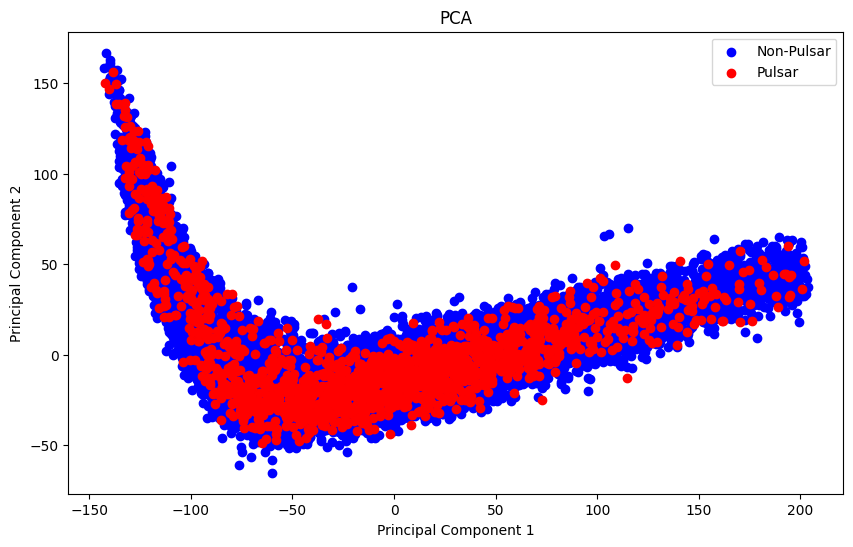

In [ ]:
# PCA

# PCA 모델 생성과 적용
pca = PCA(n_components=2)  # 주성분 개수를 2로 설정 (변경 가능)
principal_components = pca.fit_transform(features)

# 새로운 PCA 데이터프레임 생성
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['target_class'] = target

# PCA 결과 시각화
plt.figure(figsize=(10, 6))
targets = [0, 1]  
colors = ['blue', 'red']  
labels = ['Non-Pulsar', 'Pulsar'] 
for target, color, label in zip(targets, colors, labels):
    indices_to_keep = pca_df['target_class'] == target
    plt.scatter(pca_df.loc[indices_to_keep, 'PC1'],
                pca_df.loc[indices_to_keep, 'PC2'],
                c=color, label=label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.legend()
plt.show()